# Creating a black-box model

For demo purposes, we train an MLP on the Diabetes dataset and think of it as a black-box regression model.

In [ ]:
%load_ext autoreload
%autoreload 2

## Loading data

In [1]:
%%time
# Reading the data
from sklearn import datasets
import numpy as np
import gpa.gpa_util as util
from sklearn.neural_network import MLPRegressor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()
import os
import lzma
import pickle
import gpa.gpa_util as util

diabetes = datasets.load_diabetes()
print(diabetes.keys())
X0 = diabetes.get('data')
y0 = diabetes.get('target')
description = diabetes.get('DESCR')
variable_names = diabetes.get('feature_names')
N0 = len(y0)


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
CPU times: total: 344 ms
Wall time: 2.75 s


# Normalizing and visualizing the data

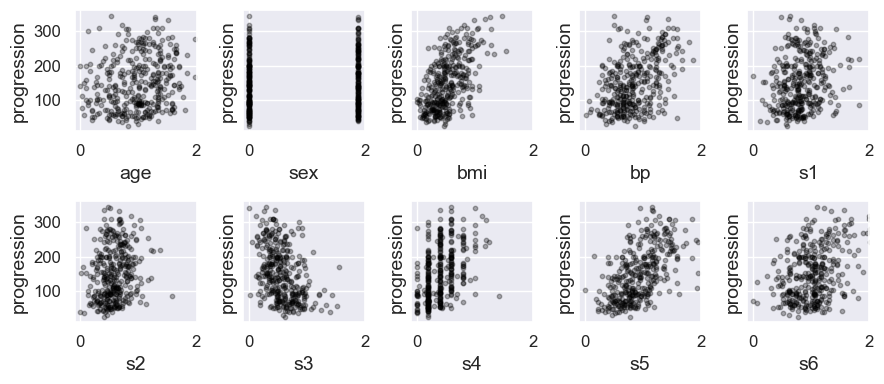

In [2]:
X1 = (X0 - X0.min(axis=0))/X0.max(axis=0)


# Train-test split
seed = 50
N_test = int(N0/5)
rng = np.random.default_rng(seed)
idxset_test = rng.choice(range(N0),N_test,replace=False)
X_test = X1[idxset_test,:]
y_test = y0[idxset_test]
X_train = np.delete(X1, idxset_test,axis=0)
y_train = np.delete(y0,idxset_test)

# Visualizing training data
variable_idx_map =np.array([[0,1,2,3,4],[5,6,7,8,9]])
fig, ax = util.show_scatter_simple(X_train,y_train,variable_names,
                        variable_idx_map,figsize=(9,4),ylabel='progression',
                        ylim=None,xlim=(-0.1,2),alpha=0.3,marker_size=10, 
                        label_font=14,tick_font=12)

## Training MLP

The R2 value is as low as 0.544 for this simple neural network. 

R2=0.5442398231744012
CPU times: total: 750 ms
Wall time: 1.52 s


c:\Users\IDE-SANIDE\Anaconda3\envs\pytorch\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'predicted')

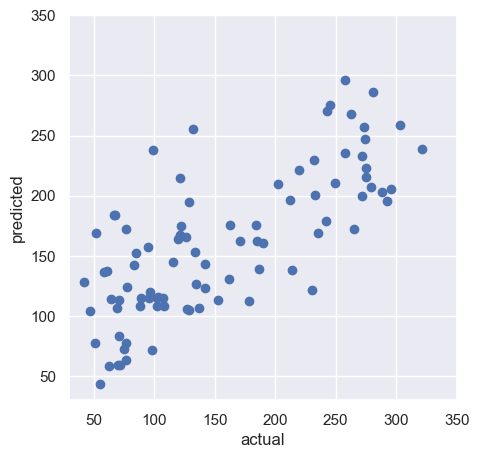

In [4]:
%%time
# Training MLP
mlp = MLPRegressor(max_iter=2000,
                   hidden_layer_sizes=(32,8), random_state=seed)
model = mlp.fit(X_train,y_train)
R2 = mlp.score(X_test, y_test); print(f'R2={R2}')

# Visualizing prediction vs actual. 
fig,ax = plt.subplots(figsize=(5,5))
ax.set_xlim(30,350)
ax.set_ylim(30,350)
ax.scatter(y_test, model.predict(X_test))   
ax.set_xlabel('actual')
ax.set_ylabel('predicted')


## Saving the trained model

In [5]:
%%time
# Saving the data and model
obj = {'model':model, 'variable_names':variable_names,
        'X_train':X_train, 'y_train':y_train,
        'X_test':X_test, 'y_test':y_test,'idxset_test':idxset_test,
        'seed':seed}

out_fn = f'Diabetes_data_and_model_seed{seed}.pickle.xz'
out_path = os.getcwd() +'\\' + out_fn
with lzma.open(out_path,'wb') as f:
    pickle.dump(obj,f)   

print(f'saved in {out_fn}')

saved in Diabetes_data_and_model_seed50.pickle.xz
CPU times: total: 15.6 ms
Wall time: 53.5 ms
